In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/E-commerce Customer Behavior - Sheet1.csv'
df = pd.read_csv(file_path)
print(df.head())
print("\nShape: ",df.shape)

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0
Satisfaction Level,0
City_Houston,0
City_Los Angeles,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


Pre processing

In [ ]:
# Drop unnecessary columns
df.drop(columns=['Customer ID'], inplace=True)

# Handle Missing Values - Drop rows with missing target values
df.dropna(subset=['Satisfaction Level'], inplace=True)

# Encode Categorical Variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Satisfaction Level']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encode 'City' and 'Membership Type'
df = pd.get_dummies(df, columns=['City', 'Membership Type'], drop_first=True)

# Convert 'Discount Applied' to integer
df['Discount Applied'] = df['Discount Applied'].astype(int)

# Handle Class Imbalance
X = df.drop(columns=['Satisfaction Level'])
y = df['Satisfaction Level']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    348 non-null    int64  
 1   Age                       348 non-null    int64  
 2   Total Spend               348 non-null    float64
 3   Items Purchased           348 non-null    int64  
 4   Average Rating            348 non-null    float64
 5   Discount Applied          348 non-null    int64  
 6   Days Since Last Purchase  348 non-null    int64  
 7   Satisfaction Level        348 non-null    int64  
 8   City_Houston              348 non-null    bool   
 9   City_Los Angeles          348 non-null    bool   
 10  City_Miami                348 non-null    bool   
 11  City_New York             348 non-null    bool   
 12  City_San Francisco        348 non-null    bool   
 13  Membership Type_Gold      348 non-null    bool   
 14  Membership Type

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)


🔹 Explained Variance Ratio (How much variance each PC captures):
PC1: 0.4028 (40.28%)
PC2: 0.2266 (22.66%)
PC3: 0.1948 (19.48%)
PC4: 0.0994 (9.94%)
PC5: 0.0601 (6.01%)

🔹 PCA Components (Feature Contributions):
       Gender       Age  Total Spend  Items Purchased  Average Rating  \
PC1  0.201859 -0.291534     0.418965         0.410661        0.400815   
PC2  0.424688 -0.242920    -0.034943         0.011387        0.091471   
PC3 -0.233848 -0.097523     0.027974         0.057685        0.049161   
PC4 -0.128362  0.158868     0.014511        -0.078282        0.156503   
PC5 -0.052715 -0.545707    -0.010042        -0.103691       -0.012439   

     Discount Applied  Days Since Last Purchase  City_Houston  \
PC1         -0.078267                 -0.217893     -0.215341   
PC2          0.118982                  0.225389     -0.282444   
PC3          0.557617                  0.403771     -0.185726   
PC4          0.134007                 -0.154967     -0.296110   
PC5         -0.210678    

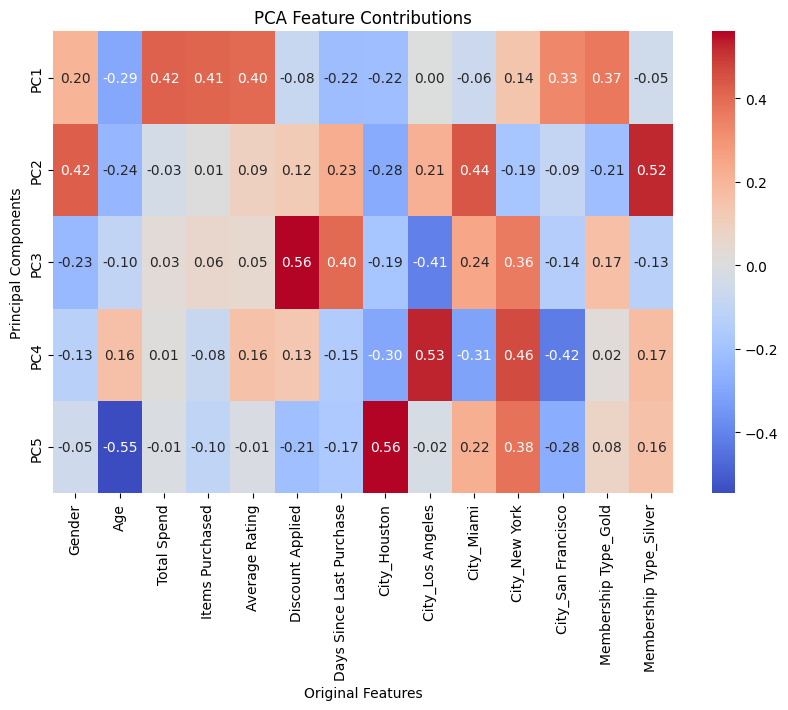


🔹 Top 3 Contributing Features for Each PC:
PC1       [Total Spend, Items Purchased, Average Rating]
PC2         [Membership Type_Silver, City_Miami, Gender]
PC3    [Discount Applied, City_Los Angeles, Days Sinc...
PC4    [City_Los Angeles, City_New York, City_San Fra...
PC5                   [City_Houston, Age, City_New York]
dtype: object


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction using PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance ratio
print("🔹 Explained Variance Ratio (How much variance each PC captures):")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.4f} ({variance * 100:.2f}%)")

# Create a DataFrame for PCA Components
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print("\n🔹 PCA Components (Feature Contributions):")
print(pca_components)

# Identify the top contributing feature for each PC
top_features_per_pc = pca_components.abs().idxmax(axis=1)

print("\n🔹 Top Contributing Feature for Each Principal Component:")
for pc, feature in top_features_per_pc.items():
    print(f"{pc}: {feature}")

# Feature Contributions Heatmap
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
plt.figure(figsize=(10, 6))
sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("PCA Feature Contributions")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()


# If you want to see the top N features contributing to each PC:
top_n = 3  # Change this to see more top features
top_features_all_pcs = pca_components.abs().apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1)

print("\n🔹 Top 3 Contributing Features for Each PC:")
print(top_features_all_pcs)

# Define Models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_pca, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

Best Parameters for Logistic Regression: {'C': 0.01}
Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 10}



Model: Logistic Regression
Accuracy: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



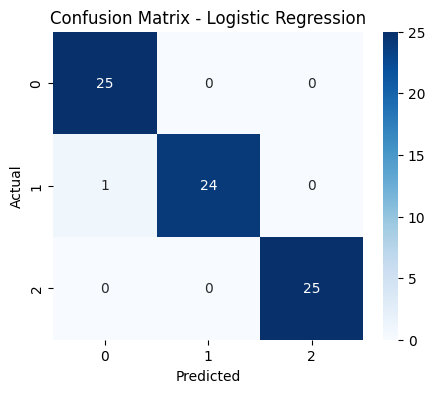


Model: SVM
Accuracy: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



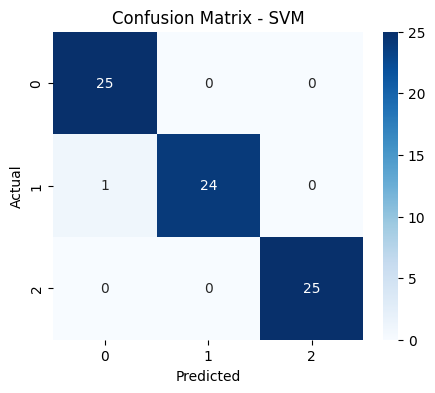


Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



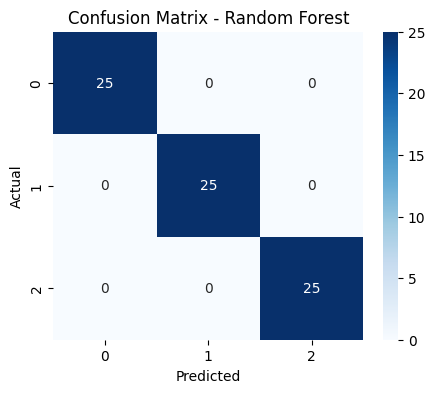

In [ ]:
# Evaluate Models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_pca)
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



